# División de Ciencias e Ingenierías de la Universidad de Guanajuato
## Fundamentos de procesamiento digital de imágenes
## TAREA : Funciones de filtrado en frecuencia
### Profesor : Dr. Arturo González Vega
### Alumno : Gustavo Magaña López

In [92]:

import copy
import importlib
from typing import Tuple, List

import numpy as np
import scipy.fftpack as F
import scipy.io as io

import cv2
import matplotlib.image as img

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

import skimage
import skimage.morphology
import skimage.filters

from PIL import Image

import scipy.io as io

In [145]:
# Importamos todas nuestras funciones :
import mfilt_funcs as mine
importlib.reload(mine)
from mfilt_funcs import *

In [99]:
def black_and_white(input_image_path):
   return Image.open(input_image_path).convert('L')

In [105]:
plt.rcParams['figure.figsize'] = (10, 10)

In [8]:
eps = np.finfo(float).eps
eps.setflags(write=False)

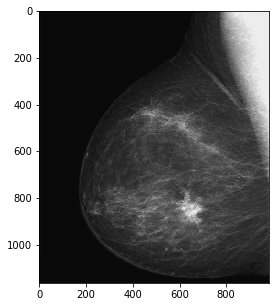

In [9]:
I = img.imread('imagenes/mama.tif')
plt.imshow(I, cmap='gray')

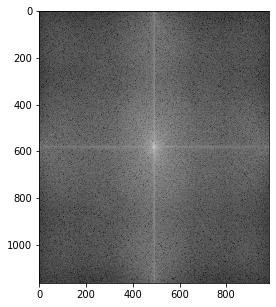

In [10]:
fft_viz(I)

In [83]:
HighI = kernel_highpass(pre_fft_processing(I), sigma=150, form='btw', n=7)

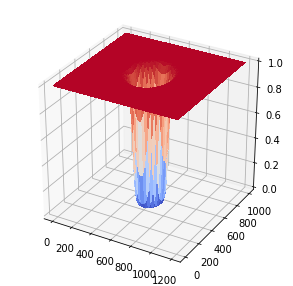

In [84]:
img_surf(HighI)

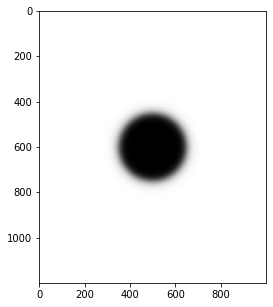

In [85]:
plt.imshow(HighI, cmap='gray')

In [60]:
list(map(cv2.getOptimalDFTSize, I.shape))

[1200, 1000]

In [62]:
I.shape

(1164, 984)

In [65]:
newI = pre_fft_processing(I)

TypeError: an integer is required (got type NoneType)

In [101]:
x = black_and_white('imagenes/RadiografiaRuidoCoherente.jpg')

In [102]:
#io.m

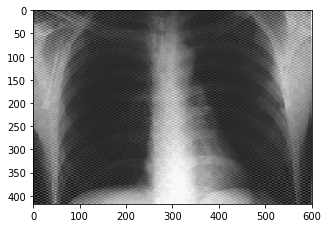

In [103]:
plt.imshow(x, cmap='gray')

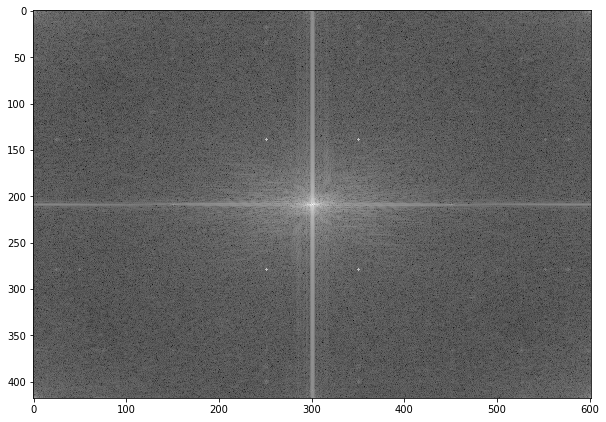

In [107]:
fft_viz(x)

In [89]:
x.shape

(418, 602, 3)

In [91]:
help(plt.imread)

Help on function imread in module matplotlib.pyplot:

imread(fname, format=None)
    Read an image from a file into an array.
    
    Parameters
    ----------
    fname : str or file-like
        The image file to read. This can be a filename, a URL or a Python
        file-like object opened in read-binary mode.
    format : str, optional
        The image file format assumed for reading the data. If not
        given, the format is deduced from the filename.  If nothing can
        be deduced, PNG is tried.
    
    Returns
    -------
    imagedata : :class:`numpy.array`
        The image data. The returned array has shape
    
        - (M, N) for grayscale images.
        - (M, N, 3) for RGB images.
        - (M, N, 4) for RGBA images.
    
    Notes
    -----
    Matplotlib can only read PNGs natively. Further image formats are
    supported via the optional dependency on Pillow. Note, URL strings
    are not compatible with Pillow. Check the `Pillow documentation`_
    for mor

In [108]:
"""
    Ideas = crear una matriz de desplazamientos.
    
"""
I

array([[ 38,  38,  38, ..., 238, 238, 238],
       [ 38,  38,  38, ..., 238, 238, 238],
       [ 35,  35,  35, ..., 238, 238, 238],
       ...,
       [ 31,  31,  31, ...,  30,  30,  30],
       [ 31,  31,  31, ...,  30,  30,  30],
       [ 31,  31,  31, ...,  30,  30,  30]], dtype=uint8)

In [109]:
U, V = fourier_meshgrid(I)
D = fourier_distance(U, V)
H = np.zeros_like(D)

In [120]:
dd = (D / D.max())*255

In [123]:
di = np.uint8(dd)

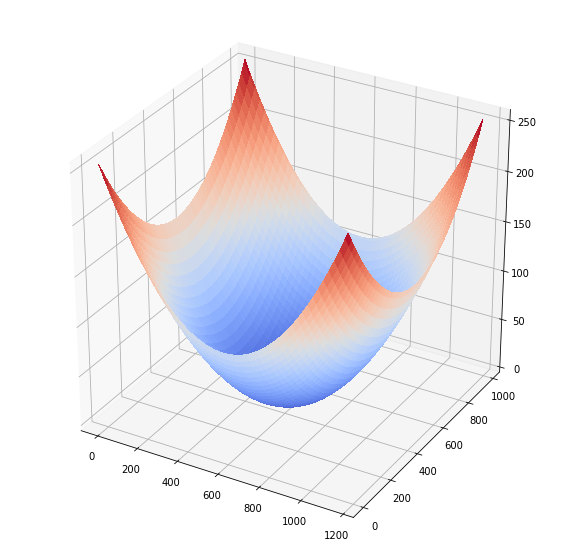

In [131]:
img_surf(distance_meshgrid_2D(I))

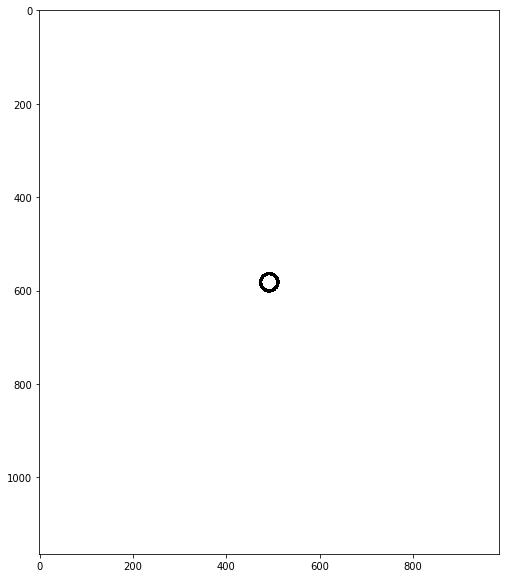

In [141]:
plt.imshow(kernel_band_reject(I, wc1=201, wc2=500), cmap='gray')

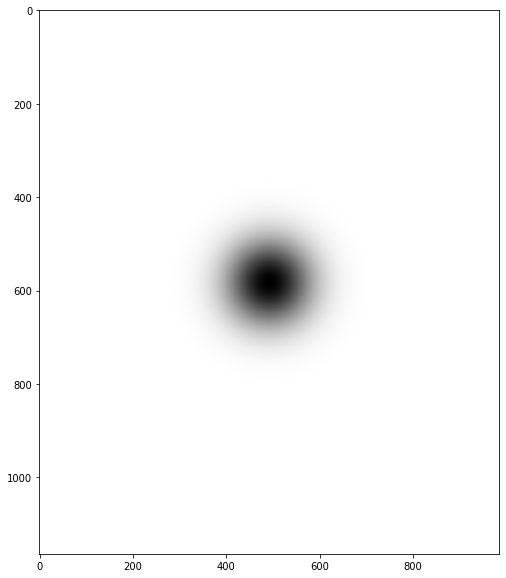

In [147]:
plt.imshow(kernel_highpass(I, form='gauss', Do=64), cmap='gray')